In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

df = pd.read_csv('/content/drive/MyDrive/Colab Data/transportation_logistics.csv')
df.head(2)

,jobs/search_query,jobs/rank_on_page,jobs/job_title_by_google,jobs/job_organization_by_google,jobs/job_city_by_google,jobs/website_by_google,jobs/posted_time_string,jobs/posted_date_by_google,jobs/scraped_date,jobs/desc
0,Air Cargo Ground Crew Supervisor jobs in usa,1,Ground Operations Supervisor,National Airlines,"Orlando, FL",via Jobs,6 days ago,2021-11-19 14:50:26,2021-11-25 14:50:26,No Information Found
1,Air Cargo Ground Crew Supervisor jobs in usa,2,Airline - Ground Handling Manager,"Ameriflight, LLC","Spokane, WA",via Learn4Good.com,6 days ago,2021-11-19 14:50:37,2021-11-25 14:50:37,Must have excellent management and communicati...


In [ ]:
df = df[["jobs/search_query","jobs/job_title_by_google","jobs/desc"]]
df = df.rename(columns={
    "jobs/search_query":"search_query",
    "jobs/job_title_by_google" :"title",
    "jobs/desc":"desc"
})
df['job_roles'] = df['search_query'].apply(lambda x : x.split('jobs')[0])
df.head(2)

,search_query,title,desc,job_roles
0,Air Cargo Ground Crew Supervisor jobs in usa,Ground Operations Supervisor,No Information Found,Air Cargo Ground Crew Supervisor
1,Air Cargo Ground Crew Supervisor jobs in usa,Airline - Ground Handling Manager,Must have excellent management and communicati...,Air Cargo Ground Crew Supervisor


In [ ]:
df = df[['job_roles','title','desc']]
df.head(2)

,job_roles,title,desc
0,Air Cargo Ground Crew Supervisor,Ground Operations Supervisor,No Information Found
1,Air Cargo Ground Crew Supervisor,Airline - Ground Handling Manager,Must have excellent management and communicati...


In [ ]:
df.shape

(1592, 3)

In [ ]:
df[df['desc']=='No Information Found'].count()

job_roles    147
title        147
desc         147
dtype: int64

In [ ]:
#Droping rows with no information in 'desc'
df.drop(df.index[df['desc']=='No Information Found'],inplace=True)

In [ ]:
df.shape

(1445, 3)

In [ ]:
!pip install clean-text

In [ ]:
# load stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_word = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from cleantext import clean
import re

def textCleaning(text):      
                         
    #     remove urls
    text = re.sub(r'http\S+', " ", text)

    #     remove mentions
    text = re.sub(r'@\w+',' ',text)

    #     remove hastags
    text = re.sub(r'#\w+', ' ', text)
    
    # take alphanumerical
    text = re.sub(r'\W+', ' ', text)

    #     remove digits
    text = re.sub(r'\d+', ' ', text)

    #     remove html tags
    text = re.sub('r<.*?>',' ', text)
    
    #     remove stop words 
    text = text.split()
    text = " ".join([word for word in text if not word in stop_word])    
      
    
    return clean(text,
        fix_unicode=True,               # fix various unicode errors
        to_ascii=True,                  # transliterate to closest ASCII representation
        lower=True,                     # lowercase text
        no_line_breaks=False,           # fully strip line breaks as opposed to only normalizing them
        no_urls=False,                  # replace all URLs with a special token
        no_emails=False,                # replace all email addresses with a special token
        no_phone_numbers=False,         # replace all phone numbers with a special token
        no_numbers=False,               # replace all numbers with a special token
        no_digits=False,                # replace all digits with a special token
        no_currency_symbols=False,      # replace all currency symbols with a special token
        no_punct=False,                 # remove punctuations
        replace_with_punct="",          # instead of removing punctuations you may replace them
        replace_with_url=" ",
        replace_with_email="<EMAIL>",
        replace_with_phone_number="<PHONE>",
        replace_with_number="<NUMBER>",
        replace_with_digit="0",
        replace_with_currency_symbol="<CUR>",
        lang="en"                       # set to 'de' for German special handling
    )

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [ ]:
df['clean_desc'] = df['desc'].apply(lambda x: textCleaning(x))

In [ ]:
df.head(2)

,job_roles,title,desc,clean_desc
1,Air Cargo Ground Crew Supervisor,Airline - Ground Handling Manager,Must have excellent management and communicati...,must excellent management communication skills...
3,Air Cargo Ground Crew Supervisor,British Airways Supervisor Ramp Services - $20...,•\r\nMust possess strong organizational and mu...,must possess strong organizational multi taski...


In [ ]:
df['clean_desc'].duplicated().sum()

193

In [ ]:
df.drop_duplicates(subset ="clean_desc", keep = 'first', inplace = True)

In [ ]:
print(df['desc'].duplicated().sum())
print(df['clean_desc'].duplicated().sum())

0
0


In [ ]:
df.drop(df.index[df['job_roles']=='Cleaner'],inplace=True)
df.drop(df.index[df['job_roles']=='Pilot'],inplace=True)
df.drop(df.index[df['job_roles']=='Sailors and Marine Oiler'],inplace=True)

In [ ]:
df.shape

(1249, 4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


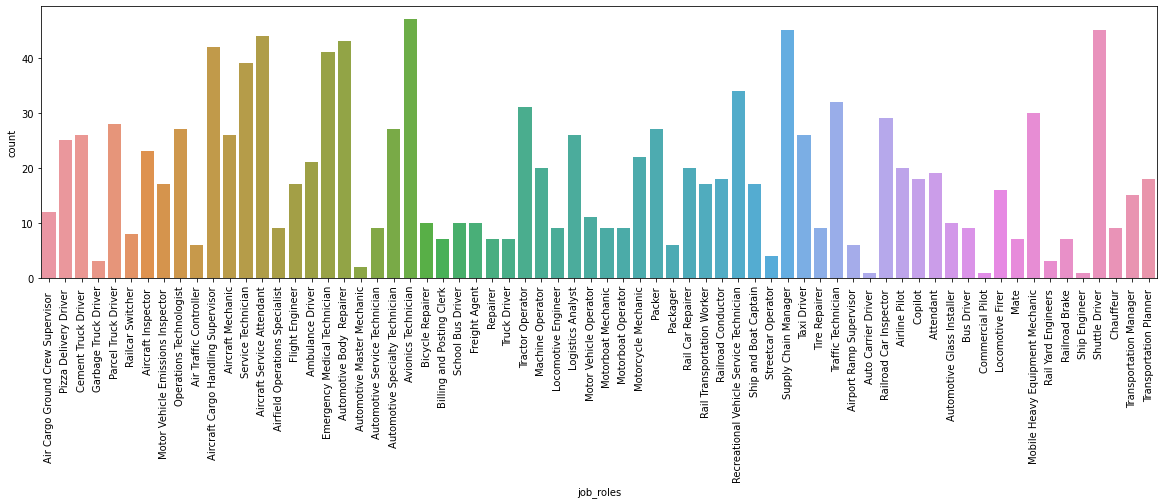

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(20,5))
sns.countplot(df['job_roles'])
plt.xticks(rotation=90);

# Cosine Similarity

In [ ]:
#Aircraft Cargo Handling Supervisor, Aircraft Mechanic
data = df['clean_desc'][df['job_roles']=='Aircraft Mechanic']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Tfidf_vect = TfidfVectorizer()
df_tfidf = Tfidf_vect.fit_transform(data)

for i in range(len(df_tfidf.toarray())):
  j=i+1
  for j in range(j,len(df_tfidf.toarray()),1):
    if cosine_similarity(df_tfidf[i],df_tfidf[j]) >= 0.90:
      print(cosine_similarity(df_tfidf[i],df_tfidf[j]))

[[0.9562996]]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.tail(2)

,job_roles,title,desc,clean_desc
1247,Transportation Planner,"Public Transportation Planner, Analyst",•\r\nTravel up to 50% (While 50% of travel is ...,travel while travel requirement role due covid...
1248,Transportation Planner,Transportation Planner,•\r\nAbility to work on multiple projects at t...,ability work multiple projects time independen...


In [ ]:
df['clean_desc'][df['job_roles'] == 'Transportation Planner '].index

Int64Index([1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241,
            1242, 1243, 1244, 1245, 1246, 1247, 1248],
           dtype='int64')

In [ ]:
def similarity(df):

  li=[]
  count=0
  count_vect = CountVectorizer()
  vector = count_vect.fit_transform(df['clean_desc'])
  job_roles = df['job_roles'].unique()

  for i in job_roles:
    data_index = df['clean_desc'][df['job_roles']== i].index
    for j in range(len(data_index)-1):
      k=j+1
      for k in range(k,len(data_index),1):
        if cosine_similarity(vector[data_index[j]],vector[data_index[k]]) >= 0.90:
          count=count+1
          li.append(data_index[k])

  li_x = [i for i in df.index if i not in li]
  df=df.iloc[li_x,:]
  return df

In [ ]:
df_extra = similarity(df)

In [ ]:
df_extra.tail(2)

,job_roles,title,desc,clean_desc
1246,Transportation Planner,Assistant Transportation Planner,•\r\nAssociate's or Bachelor's Degree in plann...,associate bachelor degree planning related fie...
1247,Transportation Planner,"Public Transportation Planner, Analyst",•\r\nTravel up to 50% (While 50% of travel is ...,travel while travel requirement role due covid...


In [ ]:
df_extra.shape

(1099, 4)

#Train Test Split

In [ ]:
X = df['clean_desc']
y = df['job_roles']

In [ ]:
'''from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_mul = mlb.fit_transform(y)'''

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8,max_features=100000)

In [ ]:
# split the dataset into training and valid test 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=9)

In [ ]:
# create Tf-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(Xtrain)
xtest_tfidf = tfidf_vectorizer.transform(Xtest)

# target variable (job_roles) encoding

In [ ]:
# mulitlable encoder
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
mlb = MultiLabelBinarizer()
y_mul = mlb.fit_transform(y.values.reshape(-1,1))

In [ ]:
mlb.classes_

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8,max_features=10000)

In [ ]:
df_tfidf = tfidf_vectorizer.fit_transform(df_extra['clean_desc'])

In [ ]:
mlb = MultiLabelBinarizer()
y_mul =  mlb.fit_transform(df_extra['job_roles'].values.reshape(-1,1))

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
svc = SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True)
svm_clf = OneVsRestClassifier(svc)

In [ ]:
svm_clf.fit(df_tfidf,y_mul)

OneVsRestClassifier(estimator=SVC(C=1000000000.0, gamma=1e-07,
                                  probability=True))

In [ ]:
svm_pred = svm_clf.predict(xtest_tfidf)

#Evaluation

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# evaluate performance
f1_score(ytest, svm_pred, average="micro")

0.23904382470119523

#Under Sampling

In [ ]:
from collections import Counter
counter_y = Counter(ytrain)

In [ ]:
for key in counter_y:
  if counter_y[key] >= 25:
    counter_y[key] = 25

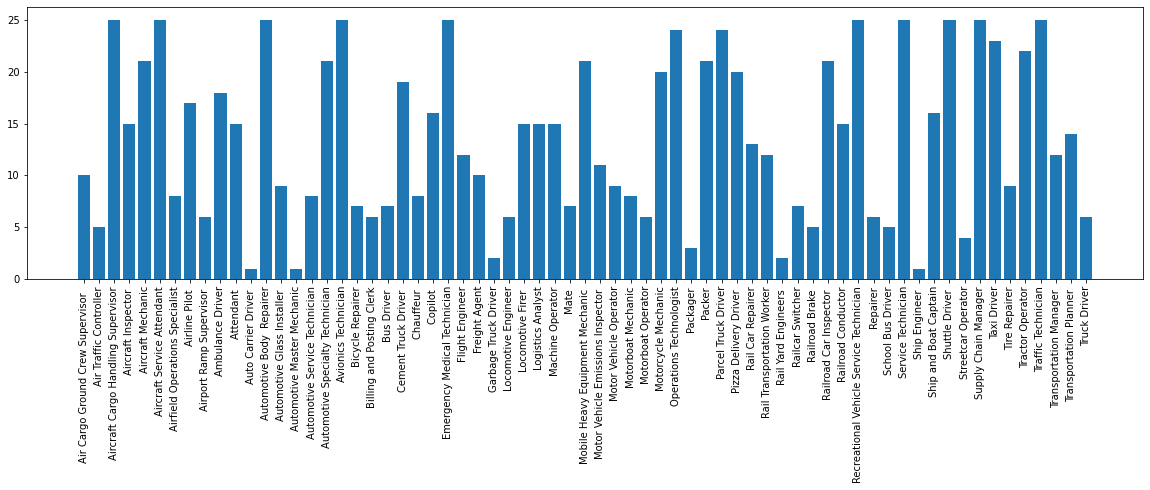

In [ ]:
from imblearn.under_sampling import ClusterCentroids
X_under, y_under = ClusterCentroids(sampling_strategy = counter_y, random_state=42).fit_resample(xtrain_tfidf, ytrain)
counter_under = Counter(y_under)

# plot the distribution
plt.figure(figsize=(20,5))
plt.bar(counter_under.keys(), counter_under.values())
plt.xticks(rotation=90);

In [ ]:
mlb = MultiLabelBinarizer()
y_under_mul =  mlb.fit_transform(y_under.values.reshape(-1,1))

In [ ]:
svm_clf_u = OneVsRestClassifier(svc)
svm_clf_u.fit(X_under, y_under_mul)

OneVsRestClassifier(estimator=SVC(C=1000000000.0, gamma=1e-07,
                                  probability=True))

In [ ]:
svm_pred_u = svm_clf_u.predict(xtest_tfidf)

In [ ]:
f1_score(mlb.transform(ytest.values.reshape(-1,1)), svm_pred_u, average="micro")

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:876: UserWarning: unknown class(es) ['Cleaner'] will be ignored
  "unknown class(es) {0} will be ignored".format(sorted(unknown, key=str))


0.24965132496513248

#Over Sampling

In [ ]:
#counter_y = Counter(ytrain)

In [ ]:
for key in counter_y:
  if counter_y[key] <= 6:
    counter_y[key] = 6

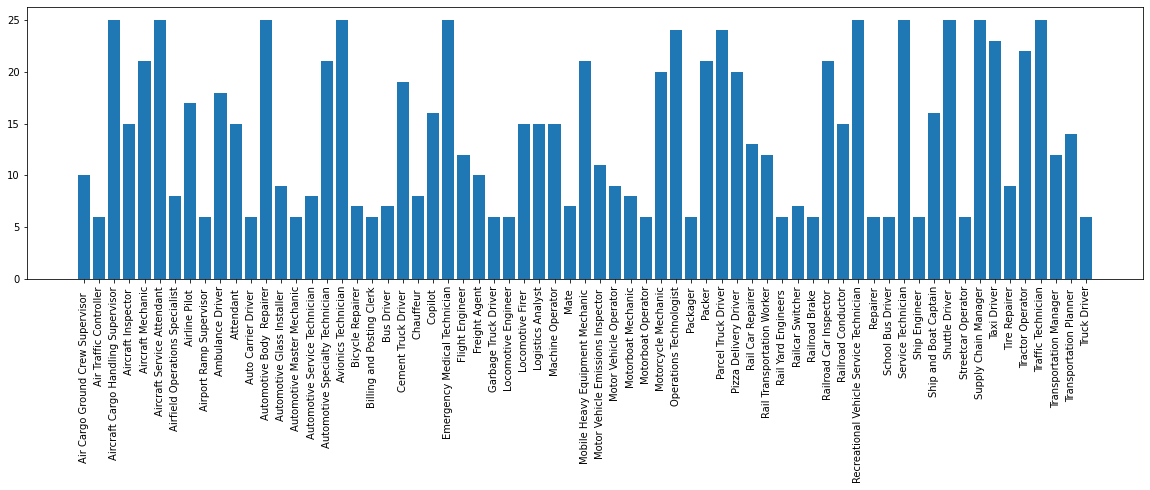

In [ ]:
from imblearn.over_sampling import RandomOverSampler
X_over, y_over = RandomOverSampler(sampling_strategy = counter_y, random_state=42).fit_resample(X_under, y_under)
# summarize distribution
counter_over = Counter(y_over)
# plot the distribution
plt.figure(figsize=(20,5))
plt.bar(counter_over.keys(), counter_over.values())
plt.xticks(rotation=90);

In [ ]:
mlb = MultiLabelBinarizer()
y_over_mul =  mlb.fit_transform(y_over.values.reshape(-1,1))

In [ ]:
svc = SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True)
svm_clf_s = OneVsRestClassifier(svc)
svm_clf_s.fit(X_over, y_over_mul)

OneVsRestClassifier(estimator=SVC(C=1000000000.0, gamma=1e-07,
                                  probability=True))

# Function For Sampling

In [ ]:
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import RandomOverSampler

def sampling(xtrain_tfidf, ytrain):

  counter_y = Counter(ytrain)
  value = 0
  for i in counter_y:
    if counter_y[i] >= value:
      value = counter_y[i]

  max = int(value * 0.70)
  min = int(value * 0.20)

  for key in counter_y:
    if counter_y[key] >= max:
      counter_y[key] = max
  X_under, y_under = ClusterCentroids(sampling_strategy = counter_y, random_state=42).fit_resample(xtrain_tfidf, ytrain)

  for key in counter_y:
    if counter_y[key] <= min:
      counter_y[key] = min
  X_over, y_over = RandomOverSampler(sampling_strategy = counter_y, random_state=42).fit_resample(X_under, y_under)

  return X_over, y_over

In [ ]:
xtrain_tfidf.shape

(999, 14349)

In [ ]:
X_over_tf, y_over_sl = sampling(xtrain_tfidf, ytrain)

In [ ]:
y_over_sl.shape

(1004,)

#Test Data

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Data/output_job_roles (2).csv')
df_test.head(2)

,job_title,clean_desc,predicted_roles
0,Production Worker - Sign-On Bonus,retention bonus the progressive processing llc...,"[('Machine Operator', 'Mobile Heavy Equipment ..."
1,Driver Class A Great Pay Home on Weekends,position description stop job search now hirin...,"[('Mobile Heavy Equipment Mechanic ', 'Packer')]"


In [ ]:
df_test_tfidf = tfidf_vectorizer.transform(df_test['clean_desc'])

In [ ]:
svm_pred = svm_clf.predict(df_test_tfidf)

In [ ]:
df_test['new_predicted_roles'] = mlb.inverse_transform(svm_pred)

In [ ]:
df_test[['job_title','predicted_roles','new_predicted_roles']].head()

,job_title,predicted_roles,new_predicted_roles
0,Production Worker - Sign-On Bonus,"[('Machine Operator', 'Mobile Heavy Equipment ...","(Machine Operator, Mobile Heavy Equipment Mech..."
1,Driver Class A Great Pay Home on Weekends,"[('Mobile Heavy Equipment Mechanic ', 'Packer')]","(Emergency Medical Technician, Mobile Heavy Eq..."
2,Class B Retail Route Driver - SIGN ON BONUS - ...,"[('Shuttle Driver ',)]","(Mobile Heavy Equipment Mechanic ,)"
3,"Amazon Package Sorter - $3,000 Sign On Bonus!","[('Aircraft Cargo Handling Supervisor', 'Aircr...","(Air Traffic Controller, Aircraft Service Atte..."
4,Local Non-CDL Box Truck Driver,"[('Aircraft Service Attendant', 'Bus Driver ',...","(Air Traffic Controller, Aircraft Cargo Handli..."


In [ ]:
df_test.to_csv('output_sim.csv')